# 2.4 微积分

In [1]:
#逼近法就是微积分

#在深度学习中，变得更好意味着最小化一个损失函数，即一个衡量“我们的模型有多糟糕”这个问题的分数。我们将拟合模型的任务分解为两个关键问题：
#1.优化：用模型拟合观测数据的过程；2.泛化：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型

## 2.4.1 导数和微分

In [2]:
#在深度学习中，我们通常选择对于模型参数可微的损失函数。
#简而言之，对于每一个参数，，如果我们把这个参数增加或减少一个无穷小的量，我们可以指导损失会以多快的速度增加或减小。
#可以将导数f'(x)解释为f(x)相对于x的瞬时变化率

#### 定义
$$
u = f(x) = 3x^2 - 4x
$$

In [3]:
%matplotlib inline
import numpy as np
from IPython import display
from d2l import torch as d2l

def f(x):
    return 3 * x ** 2 - 4 * x

D:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


#### 通过令x=1并让h接近0, $$ \frac{f(x+h)-f(x)}{h} $$ 数值结果接近2

In [4]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h
h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [5]:
#对导数的解释可视化

#注释#@save是一个特殊的标记，会将对应的函数、类或语句保存在d2l包中，因此，无需定义就可以重新调用他们。

def use_svg_display(): #@save
    '''使用svg格式在jupyter中显示绘图'''
    display.set_matplotlib_formats('svg')

In [6]:
#定义set_figsize函数来设置图表的大小

def set_figsize(figsize=(3.5, 2.5)): #@save
    '''设置matplotlib的图表大小'''
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

In [7]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    '''设置matplotlib的轴'''
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

In [12]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
        ylim=None, xscale='linear', yscale='linear',
        fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    '''绘制数据点'''
    if legend is None:
        legend = []
        
    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()
    
    #如果有一个X轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
               and not hasattr(X[0], "__len__"))
    
    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

C:\Users\yangjb\AppData\Local\Temp/ipykernel_5404/59422600.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


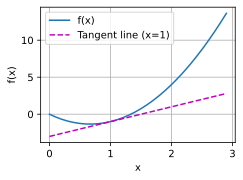

In [13]:
#绘制函数u=f(x)及其在x=1处的切线y=2x-3，其中系数2是切线的斜率
import numpy as np
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 2.4.2 偏导数

In [14]:
#在深度学习中，函数通常依赖于许多变量，因此我们需要将微分的思想推广到多元函数上

## 2.4.3 梯度

In [15]:
#我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的梯度向量。

## 2.4.4 链式法则

In [16]:
#链式法则能够微分复合函数

## 2.4.5 小结

In [17]:
#微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题
#导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率
#梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数
#链式法则使我们能够微分复合函数

## 2.4.6 练习

#### 1.绘制该函数和其在x=1处切线的图像
$$ y=f(x)=x^3 - \frac{1}{x} $$

C:\Users\yangjb\AppData\Local\Temp/ipykernel_5404/3141644434.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plot(x, [x ** 3 - 1 / x, 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])
C:\Users\yangjb\AppData\Local\Temp/ipykernel_5404/59422600.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


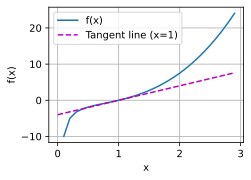

In [19]:
x = np.arange(0, 3, 0.1)
plot(x, [x ** 3 - 1 / x, 4 * x - 4], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

#### 2. 求该函数的梯度
$$f(x)=3x_1^2+5e^{x_2}$$

#### 梯度为：$$ 
f'(x_1)=6x_1,
f'(x_2)=5e^{x_2},
▽f(x)=[6x_1,5e^{x_2}]
$$

#### 3.求该函数的梯度
$$f(x)=||x||_2$$

#### 求解过程：
$$ f(x)=||x||_2=\sqrt{\sum_{i=1}^n{x_i^2}}$$
#### 设$$u(x)=\sum_{i=1}^n{x_i^2}$$
$$D(||x||_2)=D(\sqrt{u(x)})=\frac{1}{2\sqrt{u(x)}}*D(u(x))={\frac{1}{2\sqrt{\sum_{i=1}^n{x_i^2}}}*D(\sum_{i=1}^n{x_i^2})}$$
$$=\frac{1}{2\sqrt{\sum_{i=1}^n{x_i^2}}}*2x_i$$
$$▽x||x||_2=\frac{x_i}{\sqrt{\sum_{i=1}^n}{x_i^2}}=\frac{1}{||x||}\bf{X}$$

#### 4. 写出函数u=f(x, y, z)，其中x=x(a,b)，y=y(a,b)，z=z(a, b)的链式法则。

$$ \frac{du}{da}=\frac{du}{dx}\frac{dx}{da}+\frac{du}{dy}\frac{dy}{da}+\frac{du}{dz}\frac{dz}{da}$$
$$\frac{du}{db}=\frac{du}{dx}\frac{dx}{db}+\frac{du}{dy}\frac{dy}{db}+\frac{du}{dz}\frac{dz}{db}$$